# Test script for fastships_open.hull_generator with low-level input

In [1]:
# © 2023, NTNU
# Author: John Martin Kleven Godø <john.martin.godo@ntnu.no>
# This code is licenced under the GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
from datetime import datetime

import fastships_open.hull_generator.hull as hull
from matplotlib.ticker import FormatStrFormatter
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

deg2rad                          = np.pi/180
rad2deg                          = 1/deg2rad



## Input data

In [2]:
# Output directories
figures_save_dir                = './figures'
meshes_save_dir                 = './meshes'
hull_data_save_dir              = './hull_data'

# Hull form type
edgy_cs                         = False #If true then the hull will be aluminium construction friendly, with plates of very small double curvature
n_flat_sides_subm_edgy_cs       = 3 # Number of flat plates to use at each side of hull

# Resolution data
n_cs                            = 1001
n_cs_verts_subm_full            = 101

# Main dimensions
l_wl                            = 40

# Width data
width_stern                     = 2.5
entrance_angle                  = 4*deg2rad
const_width_fwd_rel             = 0.375

# Draft data
draft_max                       = 1
draft_transom                   = 0.5 * draft_max
max_draft_aft_rel               = 0.5
max_draft_fwd_rel               = 0.85
draft_dist_el_exp_fwd           = 3

# Cross-sectional superellipse data
cs_el_exp_aft                   = 4
cs_el_exp_fwd                   = 1.5
const_cs_el_exp_aft_rel         = 0.25
const_cs_el_exp_fwd_rel         = 0.9

# Above-water data
n_cs_verts_abv_w_full           = 100
abv_w_flare_h_aft               = 1.5
abv_w_flare_h_fwd               = 2.0
abv_w_flare_w_aft               = 0.3
const_abv_w_flare_fwd_rel       = 0.5
abv_w_flare_dist_se_exp         = 2
h_main_deck                     = 2.5

## Generate hull

In [3]:
my_hull                          = hull.Hull()
my_hull.edgy_cs                  = edgy_cs
my_hull.n_flat_sides_subm_edgy_cs= n_flat_sides_subm_edgy_cs
my_hull.set_resolution(n_cs, n_cs_verts_subm_full)
my_hull.set_main_dimensions(l_wl)
my_hull.set_width_data(width_stern, entrance_angle, const_width_fwd_rel)
my_hull.set_draft_data(draft_max, draft_transom, max_draft_aft_rel, max_draft_fwd_rel, draft_dist_el_exp_fwd)
my_hull.set_cs_el_exp_data(cs_el_exp_aft, cs_el_exp_fwd, const_cs_el_exp_aft_rel, const_cs_el_exp_fwd_rel)
my_hull.set_abv_w_data(n_cs_verts_abv_w_full, abv_w_flare_h_aft, abv_w_flare_h_fwd, abv_w_flare_w_aft, const_abv_w_flare_fwd_rel, abv_w_flare_dist_se_exp, h_main_deck)
my_hull.generate_long_property_distributions()
my_hull.generate_sections()
my_hull.generate_verts()
my_hull.generate_faces()



## Export wavefront mesh

In [4]:
now                  = datetime.now()
now_string           = now.strftime("%Y%m%d")
mesh_name            = now_string + '_generic_fast_ferry_low_level_input.obj'
mesh_save_path       = meshes_save_dir + '/' + mesh_name
my_hull.export_obj(mesh_save_path)

## Export waterlines and sections drawings

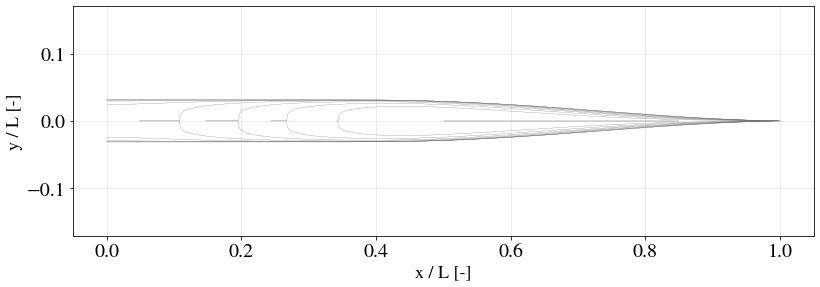

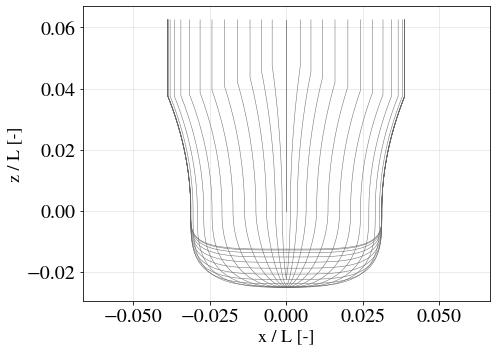

In [5]:
my_hull.export_waterlines(figures_save_dir)
my_hull.export_sections(figures_save_dir)

## Plot longitudinal variations of key parameters

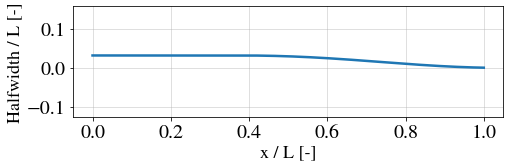

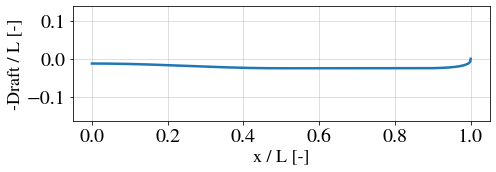

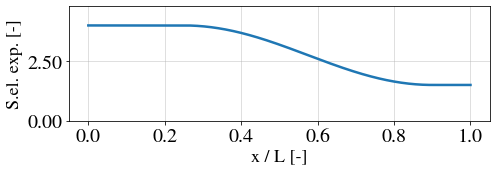

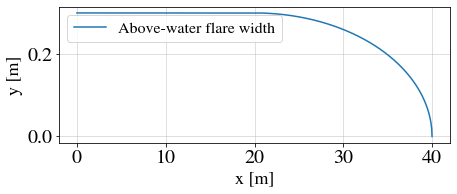

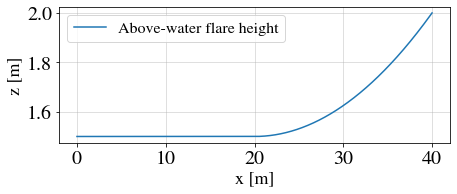

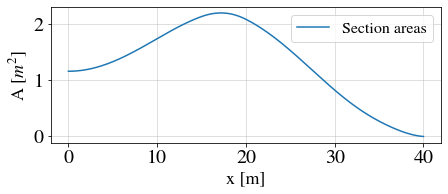

In [6]:
figure_size_wide                 = (7, 2.5)
figure_size_narrow               = (7, 5)
line_width                       = 2.5
font_size                        = 18
label_font_size                  = 18
ticks_font_size                  = 20
legend_font_size                 = 16

line_width_hull                  = 0.25
mirror_hull_plot                 = True


now                  = datetime.now()
now_string           = now.strftime("%Y%m%d")



fig, ax = plt.subplots(1, 1, figsize = figure_size_wide)
ax.plot(my_hull.station_x_vec/l_wl, 0.5*my_hull.width_vec/l_wl, color = 'tab:blue', linewidth = line_width)
#ax.plot(my_hull.station_x_vec, -0.5*my_hull.width_vec, color = 'tab:blue', linestyle = 'dashed', label = 'Mirrored halfwidth')
#ax.axhline(0, color = 'k')
ax.axis('equal')
ax.set_xlabel('x / L [-]', fontsize = label_font_size)
ax.set_ylabel('Halfwidth / L [-]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)
#ax.legend(fontsize = legend_font_size)
fig.tight_layout()
#fig_name       = now_string + '_width_dist_draft_based'
#fig.savefig(figures_save_dir + fig_name + '.png', dpi = 600)
#fig.savefig(figures_save_dir + fig_name + '.pdf')


fig, ax = plt.subplots(1, 1, figsize = figure_size_wide)
ax.plot(my_hull.station_x_vec/l_wl, -my_hull.draft_vec/l_wl, linewidth = line_width)
ax.axis('equal')
ax.set_xlabel('x / L [-]', fontsize = label_font_size)
ax.set_ylabel('-Draft / L [-]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)
#ax.legend(fontsize = legend_font_size)
fig.tight_layout()
#fig_name       = now_string + '_draft_dist_draft_based'
#fig.savefig(figures_save_dir + fig_name + '.png', dpi = 600)
#fig.savefig(figures_save_dir + fig_name + '.pdf')

fig, ax = plt.subplots(1, 1, figsize = figure_size_wide)
ax.plot(my_hull.station_x_vec/l_wl, my_hull.cs_el_exp_vec, linewidth = line_width)#, label = 'Cross-sectional superellipse exponent')
#ax.axis('equal')
ax.set_xlabel('x / L [-]', fontsize = label_font_size)
ax.set_ylabel('S.el. exp. [-]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)
ax.set_ylim(0, 1.2 * np.amax(my_hull.cs_el_exp_vec))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.legend(fontsize = legend_font_size)
fig.tight_layout()
#fig_name       = now_string + '_cs_el_exp_draft_based'
#fig.savefig(figures_save_dir + fig_name + '.png', dpi = 600)
#fig.savefig(figures_save_dir + fig_name + '.pdf')

fig, ax = plt.subplots(1, 1, figsize = figure_size_wide)
ax.plot(my_hull.station_x_vec, my_hull.abv_w_flare_w_vec, label = 'Above-water flare width')
#ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel('y [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)
ax.legend(fontsize = legend_font_size)
#fig_name       = now_string + '_abv_w_flare_w_draft_based'
#fig.savefig(figures_save_dir + fig_name + '.png', dpi = 600)
#fig.savefig(figures_save_dir + fig_name + '.pdf')


fig, ax = plt.subplots(1, 1, figsize = figure_size_wide)
ax.plot(my_hull.station_x_vec, my_hull.abv_w_flare_h_vec, label = 'Above-water flare height')
#ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel('z [m]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)
ax.legend(fontsize = legend_font_size)
#fig_name       = now_string + '_abv_w_flare_h_draft_based'
#fig.savefig(figures_save_dir + fig_name + '.png', dpi = 600)
#fig.savefig(figures_save_dir + fig_name + '.pdf')

fig, ax = plt.subplots(1, 1, figsize = figure_size_wide)
ax.plot(my_hull.station_x_vec, my_hull.cs_A_vec, label = 'Section areas')
#ax.axis('equal')
ax.set_xlabel('x [m]', fontsize = label_font_size)
ax.set_ylabel(r'A [$m^2$]', fontsize = label_font_size)
ax.tick_params(axis='both', which='major', labelsize = ticks_font_size)
ax.grid(alpha = 0.5)
ax.legend(fontsize = legend_font_size)
#fig_name       = now_string + '_section_area_curve_draft_based'
#fig.savefig(figures_save_dir + fig_name + '.png', dpi = 600)
#fig.savefig(figures_save_dir + fig_name + '.pdf')